# **1. Perkenalan Dataset**


Dataset yang digunakan dalam projek ini adalah Banking Dataset. Data ini berkaitan dengan kampanye pemasaran langsung (melalui telepon) yang dilakukan oleh sebuah lembaga perbankan di Portugal. Dalam kampanye ini, pihak bank menghubungi calon nasabah secara langsung untuk menawarkan produk deposito berjangka.

**Sumber Dataset**: Dataset yang digunakan bersumber dari [Kaggle](https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
df = pd.read_csv('../dataset/banking-data.csv', sep=';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# jumlah data
df.shape

(45211, 17)

In [6]:
# description data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
# check for duplicate rows
print("Jumlah duplikat data :", df.duplicated().sum())

Jumlah duplikat data : 0


In [9]:
df.sort_values(by='duration', ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,no
9947,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes
44602,45,services,single,secondary,no,955,no,no,unknown,27,aug,3785,1,-1,0,unknown,no
19639,37,blue-collar,married,tertiary,no,359,no,yes,cellular,7,aug,3422,2,-1,0,unknown,no
2386,45,blue-collar,married,secondary,no,66,yes,no,unknown,13,may,3366,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31740,39,technician,divorced,secondary,no,17441,yes,yes,cellular,7,apr,1,1,-1,0,unknown,no
44758,28,admin.,married,secondary,no,1595,no,no,unknown,9,sep,1,1,254,4,success,no
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [10]:
df.sort_values(by='previous', ascending=False)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40,management,married,tertiary,no,543,yes,no,cellular,2,feb,349,2,262,275,other,no
38326,46,blue-collar,married,primary,no,1085,yes,yes,cellular,15,may,523,2,353,58,other,yes
44089,37,technician,married,secondary,no,432,yes,no,cellular,6,jul,386,3,776,55,failure,yes
28886,31,management,single,tertiary,no,358,yes,no,cellular,30,jan,68,3,256,51,failure,no
44822,27,blue-collar,married,secondary,no,821,yes,yes,unknown,16,sep,23,1,778,41,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45187,32,services,single,secondary,no,1168,yes,no,cellular,16,nov,411,1,-1,0,unknown,yes
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
10,41,admin.,divorced,secondary,no,270,yes,no,unknown,5,may,222,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


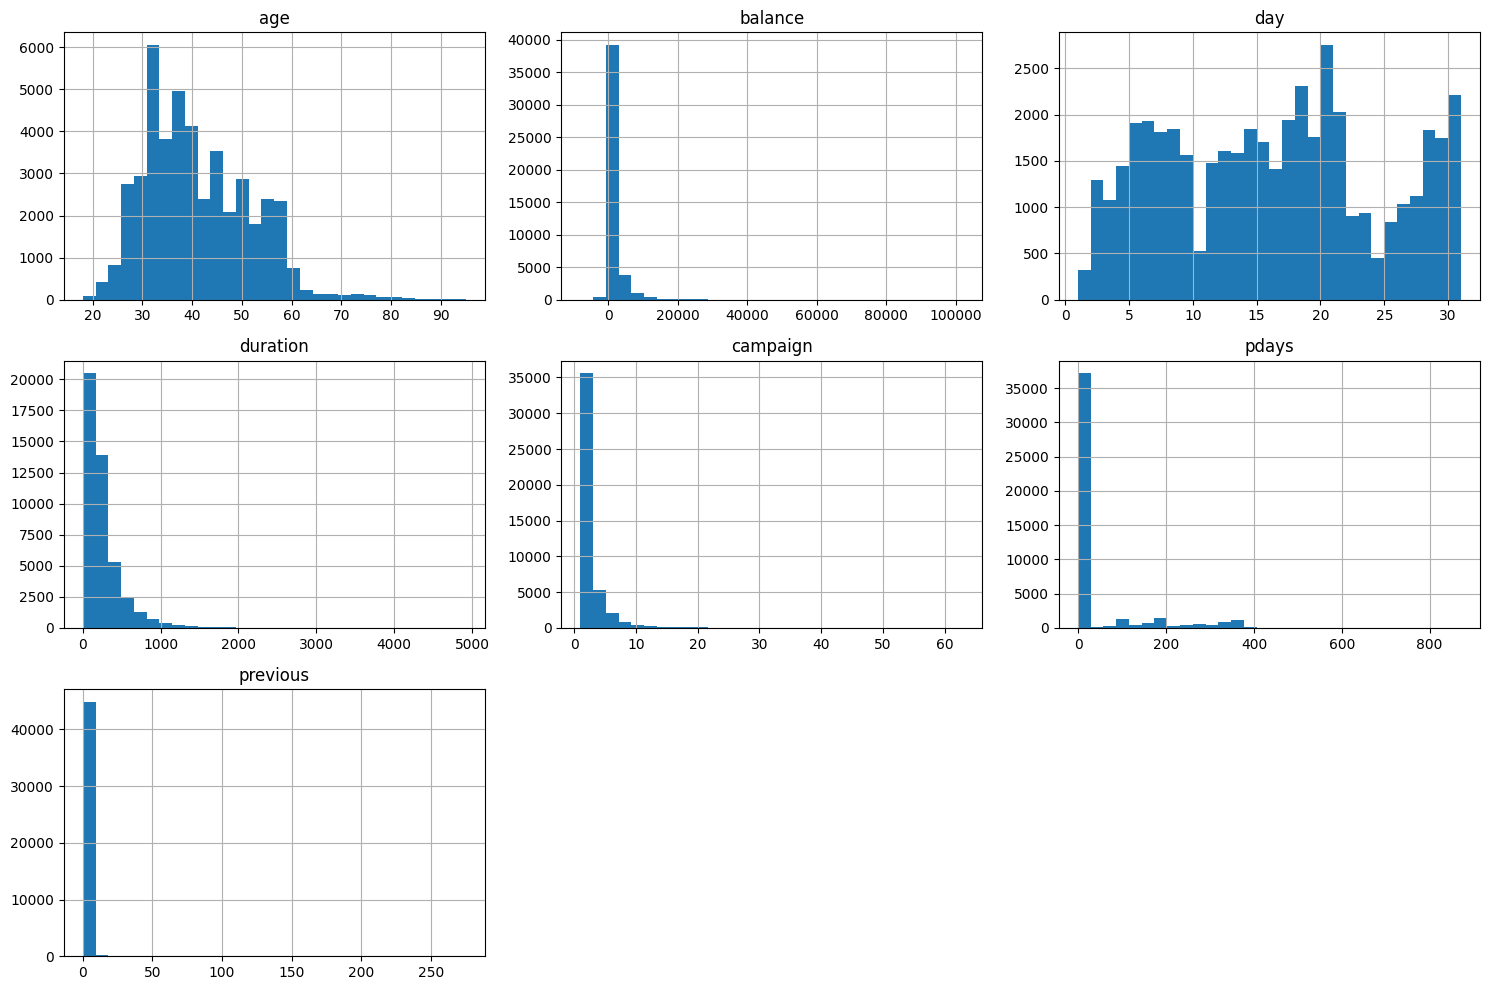

In [11]:
# Visualisasi distribusi data numerik
df.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

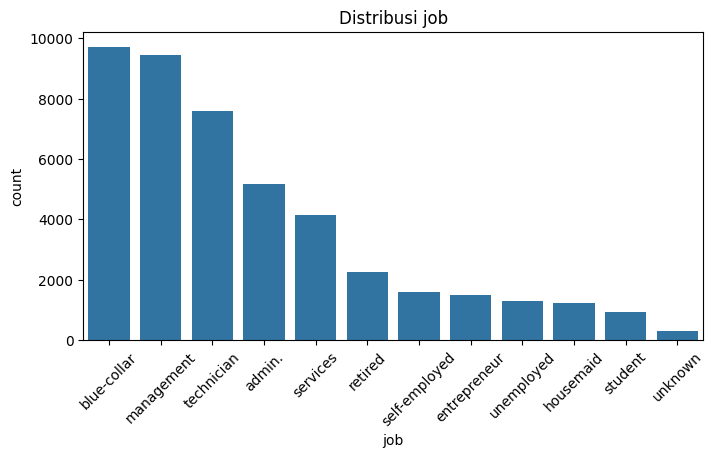

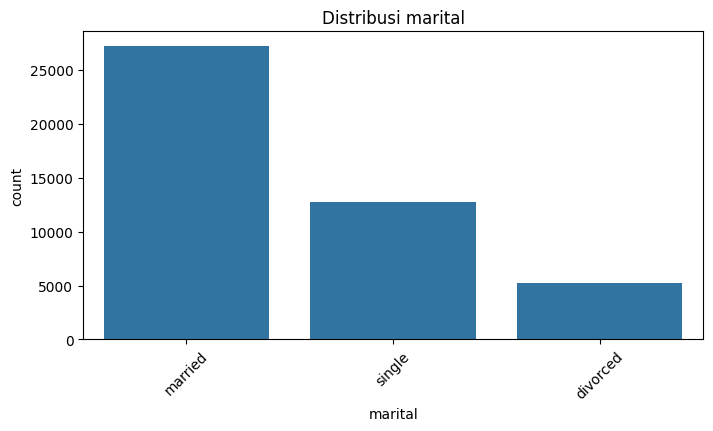

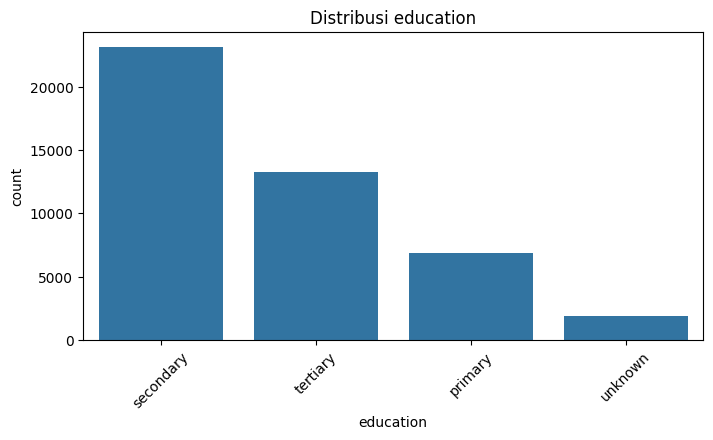

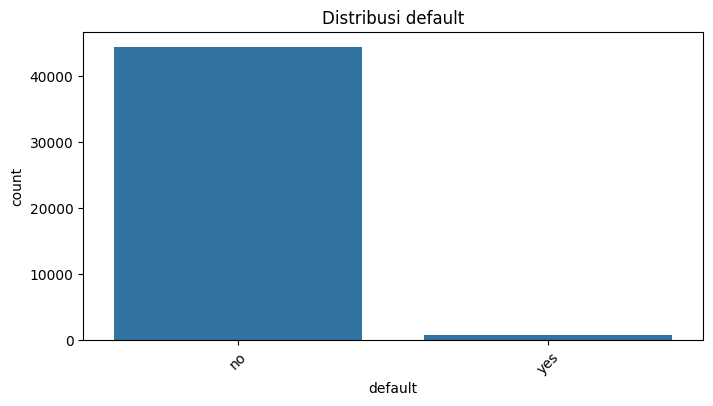

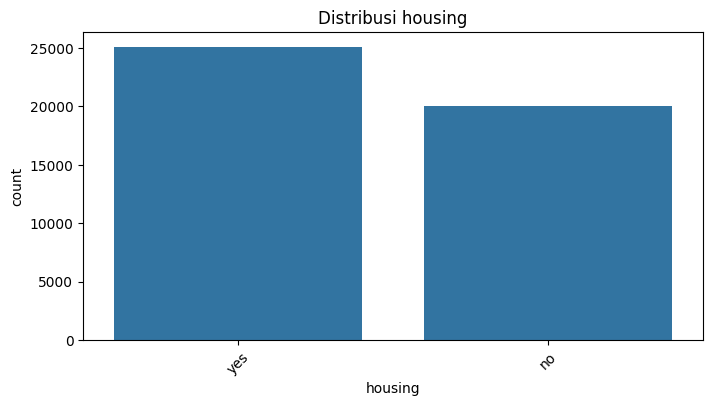

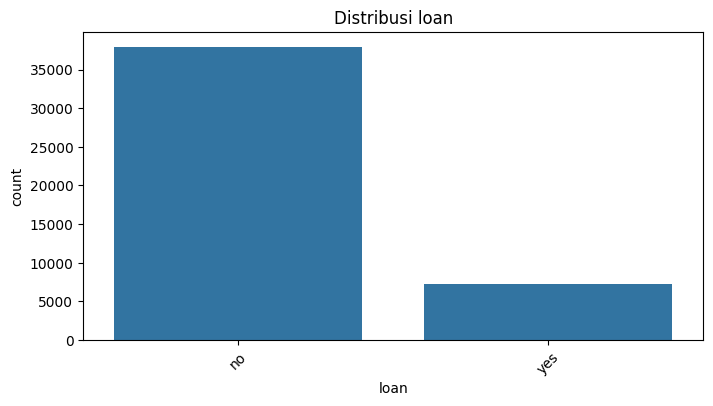

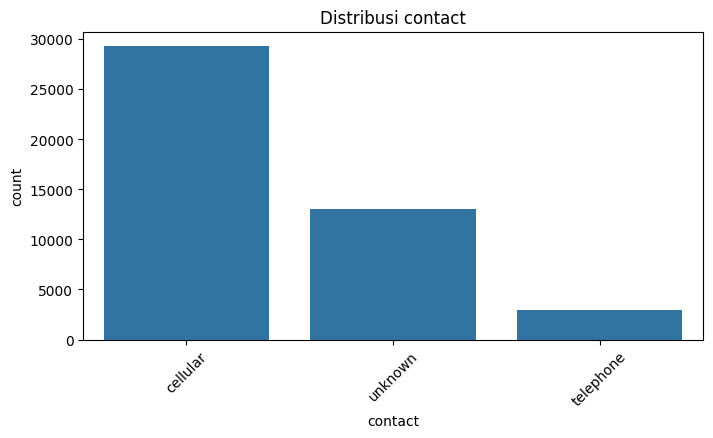

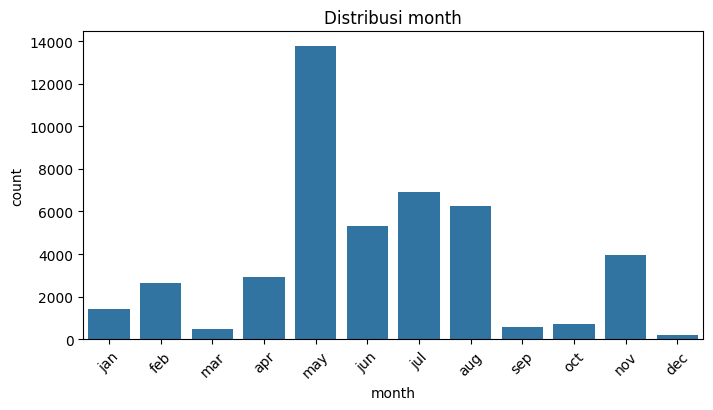

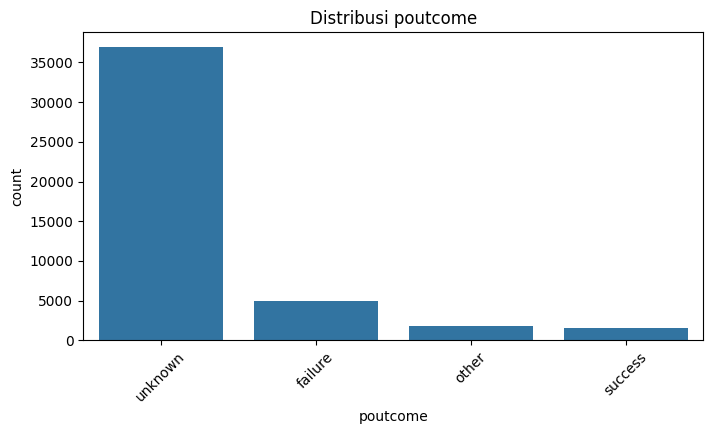

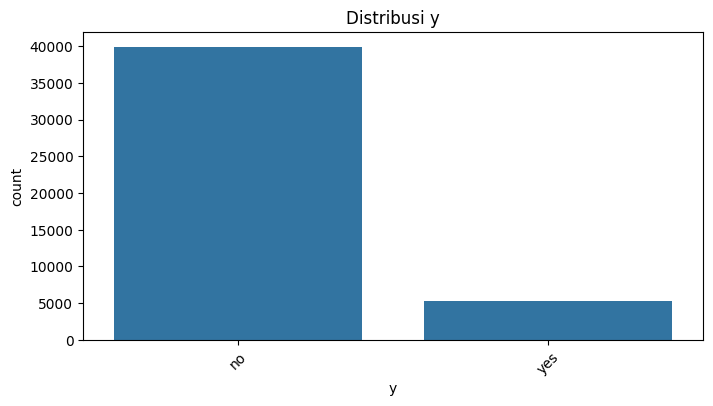

In [13]:
# Visualisasi distribusi data kategorikal
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    if col == 'month':
        sns.countplot(data=df, x=col, order=month_order)
    else:
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.xticks(rotation=45)
    plt.show()

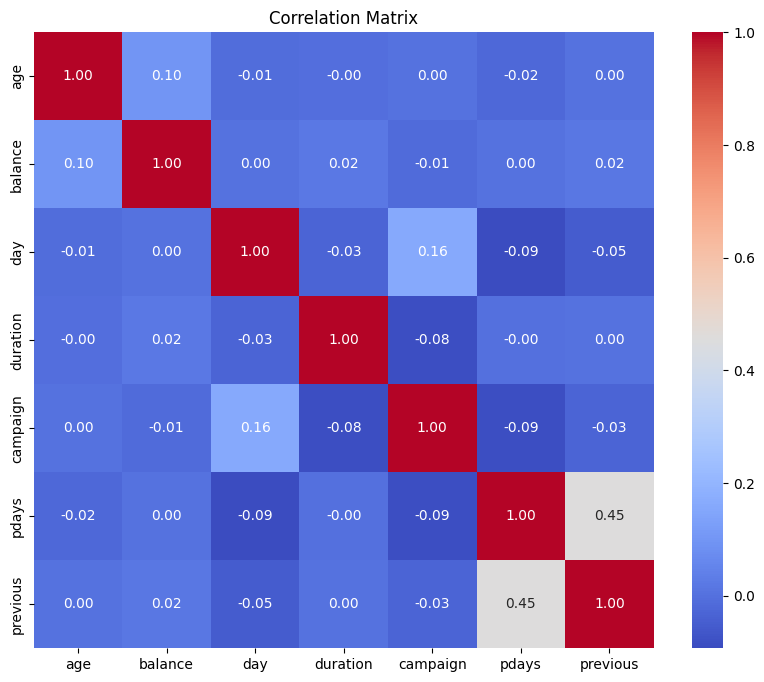

In [14]:
# Menampilkan matriks korelasi untuk fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Check & Handling Outliers

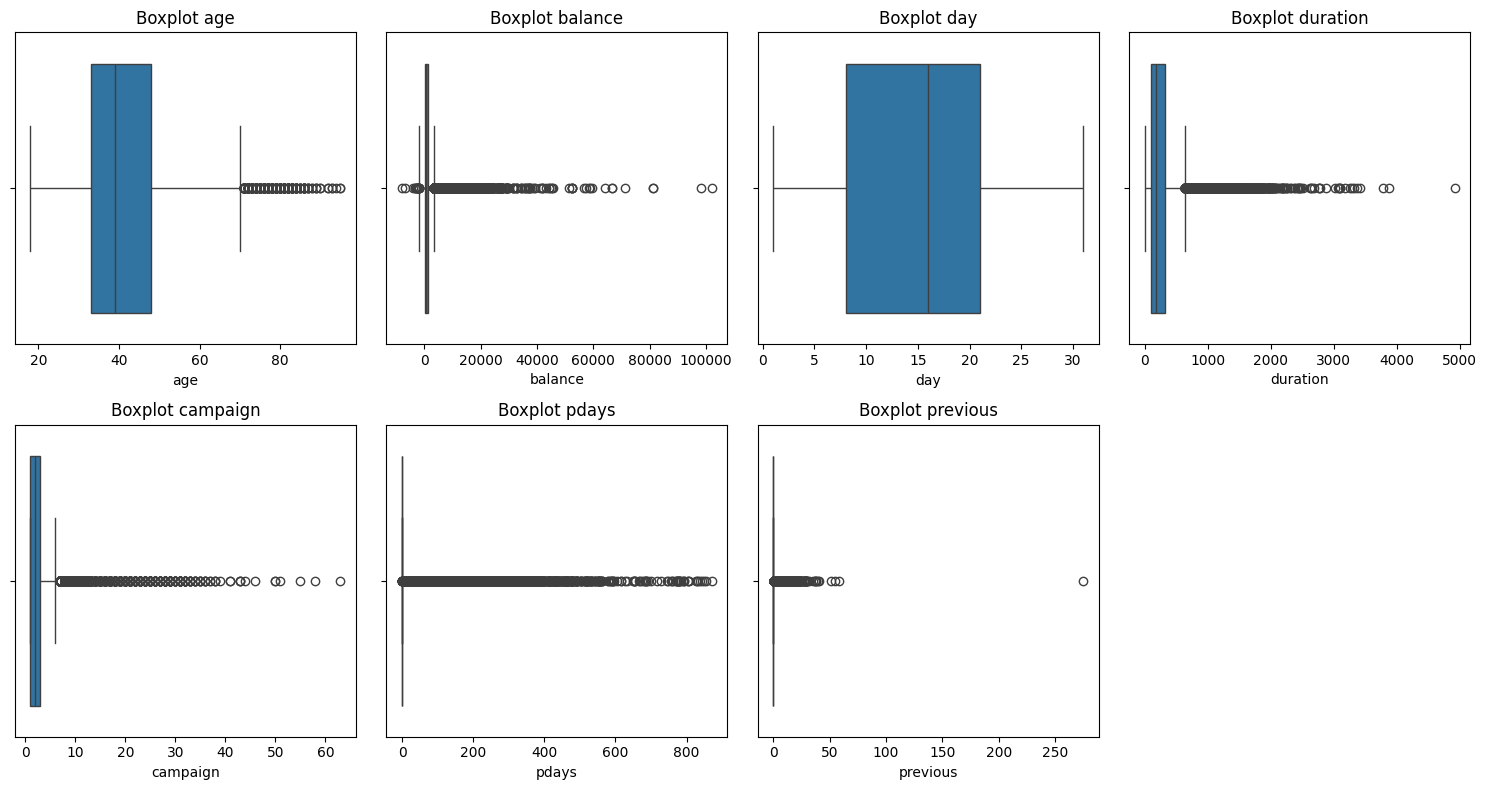

In [15]:
# checking for outliers using boxplots
# Boxplot untuk setiap fitur numerik
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [16]:
# handling outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.01)
    Q3 = df[column].quantile(0.99)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [17]:
# remove outliers for 'previous'
df = remove_outliers(df, 'previous')

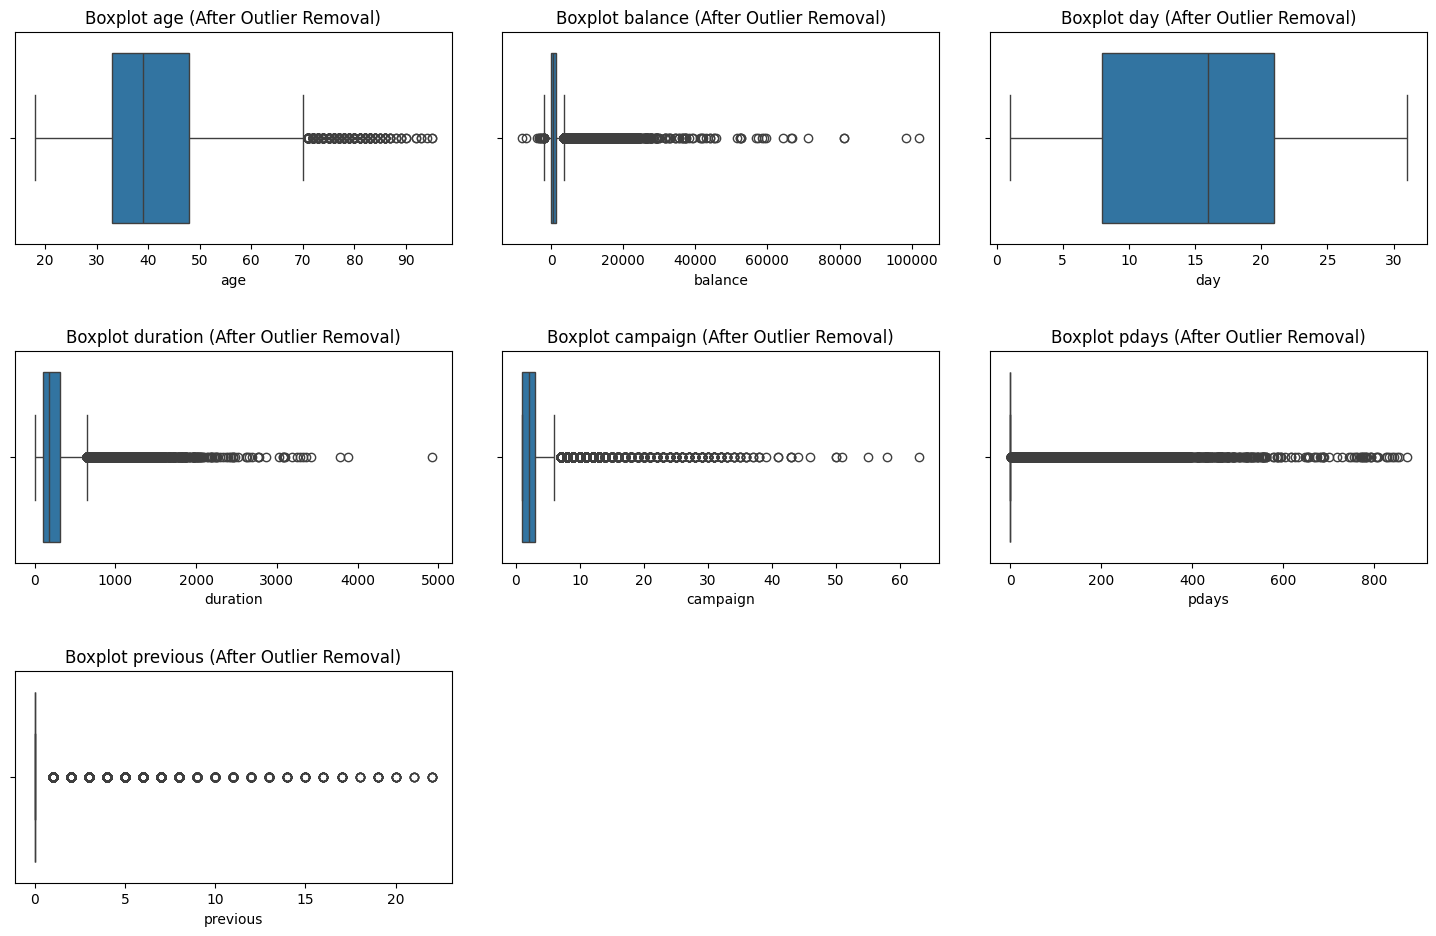

In [18]:
# Visualisasi data setelah menghapus outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col} (After Outlier Removal)')
    plt.tight_layout(pad=3.0)  # tambahkan jarak antar baris subplot
plt.show()

## One Hot Encoding Data Kategorikal

In [19]:
# Salin data
df_processed = df.copy()

In [20]:
# Ubah kolom 'yes'/'no' menjadi 1/0
yes_no_cols = ['default', 'housing', 'loan', 'y']
for col in yes_no_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# One-hot encoding (kecuali kolom target 'y')
categorical_cols = df_processed.select_dtypes(include='object').columns
categorical_cols_no_target = [col for col in categorical_cols if col != 'y']
df_processed = pd.get_dummies(df_processed, columns=categorical_cols_no_target, drop_first=True)

In [21]:
df_processed.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,False,True,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,False,True,False,False,False,False,False,True


## Standardization Data Numerik

In [22]:
# Standardisasi kolom numerik
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns.drop('y')
scaler = StandardScaler()
df_processed[numeric_cols] = scaler.fit_transform(df_processed[numeric_cols])

# Tampilkan hasil
df_processed.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606445,-0.135389,0.256630,0.894276,-0.436667,-1.298709,0.010953,-0.568998,-0.410478,-0.32982,...,False,False,False,True,False,False,False,False,False,True
1,0.288188,-0.135389,-0.437768,0.894276,-0.436667,-1.298709,-0.416320,-0.568998,-0.410478,-0.32982,...,False,False,False,True,False,False,False,False,False,True
2,-0.747586,-0.135389,-0.446637,0.894276,2.290073,-1.298709,-0.707643,-0.568998,-0.410478,-0.32982,...,False,False,False,True,False,False,False,False,False,True
3,0.570671,-0.135389,0.047391,0.894276,-0.436667,-1.298709,-0.645494,-0.568998,-0.410478,-0.32982,...,False,False,False,True,False,False,False,False,False,True
4,-0.747586,-0.135389,-0.446966,-1.118223,-0.436667,-1.298709,-0.233758,-0.568998,-0.410478,-0.32982,...,False,False,False,True,False,False,False,False,False,True


In [7]:
%%writefile automate_Agus-Saputra-Kambea.py
import pandas as pd
from sklearn.preprocessing import StandardScaler
import mlflow
import warnings

if __name__ == "__main__":

    warnings.filterwarnings("ignore")

    def preprocess_banking_data(df):
        """
        Melakukan preprocessing otomatis pada banking dataset:
        1. Menghapus outlier pada kolom 'previous'
        2. Mapping kolom 'yes'/'no' menjadi 1/0 pada kolom tertentu
        3. One-hot encoding pada kolom kategorikal (kecuali target)
        4. Standardisasi fitur numerik (kecuali target)
        5. Mengembalikan dataframe siap latih
        """
        # 1. Remove outliers for 'previous'
        Q1 = df['previous'].quantile(0.01)
        Q3 = df['previous'].quantile(0.99)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df['previous'] >= lower_bound) & (df['previous'] <= upper_bound)].copy()

        # 2. Map 'yes'/'no' columns to 1/0
        yes_no_cols = ['default', 'housing', 'loan', 'y']
        for col in yes_no_cols:
            if col in df.columns:
                df[col] = df[col].map({'yes': 1, 'no': 0})

        # 3. One-hot encoding for categorical columns except target
        categorical_cols = df.select_dtypes(include='object').columns
        categorical_cols_no_target = [col for col in categorical_cols if col != 'y']
        df = pd.get_dummies(df, columns=categorical_cols_no_target, drop_first=True)

        # 4. Standardize numeric columns except target
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('y')
        scaler = StandardScaler()
        df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

        return df

    with mlflow.start_run():
        # Load dataset
        df = pd.read_csv('dataset/banking-data.csv', sep=';')

        # Preprocess the data
        df_processed = preprocess_banking_data(df)

        # Log the processed DataFrame as an artifact
        output_path = 'preprocessing/banking-data_preprocessing.csv'
        df_processed.to_csv(output_path, index=False)
        mlflow.log_artifact(output_path)
        
        print(f"Preprocessing completed and data saved as '{output_path}'.")

        mlflow.log_param("preprocessing_steps", "outlier_removal, yes_no_mapping, one_hot_encoding, standardization")
        mlflow.log_metric("num_rows", df_processed.shape[0])
        mlflow.log_metric("num_columns", df_processed.shape[1])

        print("Data preprocessing and logging completed successfully.")


Overwriting automate_Agus-Saputra-Kambea.py
